In [31]:
import pandas as pd
from google.colab import files
import io

# Subir el archivo CSV
uploaded = files.upload()

# Asumimos que solo se sube un archivo, obtenemos el nombre del archivo subido
file_name = list(uploaded.keys())[0]

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv(io.StringIO(uploaded[file_name].decode('utf-8')))

# Mostrar las primeras filas para verificar que se cargó correctamente
print(df.head())

Saving datos_tratados.csv to datos_tratados (1).csv
   customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes     

In [32]:
# Eliminar la columna 'customerID'
df = df.drop('customerID', axis=1)

# Verificar que la columna ha sido eliminada
print(df.head())

  Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0    No          Female                       0              Yes   
1    No            Male                       0               No   
2   Yes            Male                       0               No   
3   Yes            Male                       1              Yes   
4   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet.InternetService internet.OnlineSecurity internet.OnlineBackup  \
0                      DSL  

In [33]:
# Identificar columnas categóricas (excluyendo la variable objetivo si es categórica)
categorical_cols = df.select_dtypes(include=['object']).columns

# Aplicar one-hot encoding a las columnas categóricas
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Mostrar las primeras filas del DataFrame codificado
print(df_encoded.head())

   customer.SeniorCitizen  customer.tenure  account.Charges.Monthly  \
0                       0                9                     65.6   
1                       0                9                     59.9   
2                       0                4                     73.9   
3                       1               13                     98.0   
4                       1                3                     83.9   

   account.Charges.Total  Churn_Yes  customer.gender_Male  \
0                 593.30      False                 False   
1                 542.40      False                  True   
2                 280.85       True                  True   
3                1237.85       True                  True   
4                 267.40       True                 False   

   customer.Partner_Yes  customer.Dependents_Yes  phone.PhoneService_Yes  \
0                  True                     True                    True   
1                 False                    False      

In [34]:
# Calcular la proporción de clientes que cancelaron (Churn_Yes) vs. los que no cancelaron
churn_counts = df_encoded['Churn_Yes'].value_counts()

# Calcular las proporciones
churn_proportions = churn_counts / len(df_encoded)

# Mostrar los resultados
print("Proporción de clientes que cancelaron vs. los que no cancelaron:")
print(churn_proportions)

# Evaluar si existe un desbalance significativo
if churn_proportions[True] < 0.3:  # Umbral de ejemplo para considerar desbalance
    print("\nExiste un desbalance significativo entre las clases.")
else:
    print("\nNo parece haber un desbalance significativo entre las clases.")

Proporción de clientes que cancelaron vs. los que no cancelaron:
Churn_Yes
False    0.74242
True     0.25758
Name: count, dtype: float64

Existe un desbalance significativo entre las clases.


In [35]:
numerical_cols = df_encoded.select_dtypes(include=['number']).columns
df_numerical = df_encoded[numerical_cols]

print("Columnas numéricas seleccionadas:")
print(numerical_cols)
print("\nPrimeras filas del DataFrame con columnas numéricas:")
print(df_numerical.head())

Columnas numéricas seleccionadas:
Index(['customer.SeniorCitizen', 'customer.tenure', 'account.Charges.Monthly',
       'account.Charges.Total'],
      dtype='object')

Primeras filas del DataFrame con columnas numéricas:
   customer.SeniorCitizen  customer.tenure  account.Charges.Monthly  \
0                       0                9                     65.6   
1                       0                9                     59.9   
2                       0                4                     73.9   
3                       1               13                     98.0   
4                       1                3                     83.9   

   account.Charges.Total  
0                 593.30  
1                 542.40  
2                 280.85  
3                1237.85  
4                 267.40  


In [36]:
correlation_matrix = df_numerical.corr()
print("Matriz de correlación de características numéricas:")
display(correlation_matrix)

Matriz de correlación de características numéricas:


,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total
customer.SeniorCitizen,1.000000,0.017333,0.220098,0.103499
customer.tenure,0.017333,1.000000,0.246981,0.825118
account.Charges.Monthly,0.220098,0.246981,1.000000,0.652109
account.Charges.Total,0.103499,0.825118,0.652109,1.000000


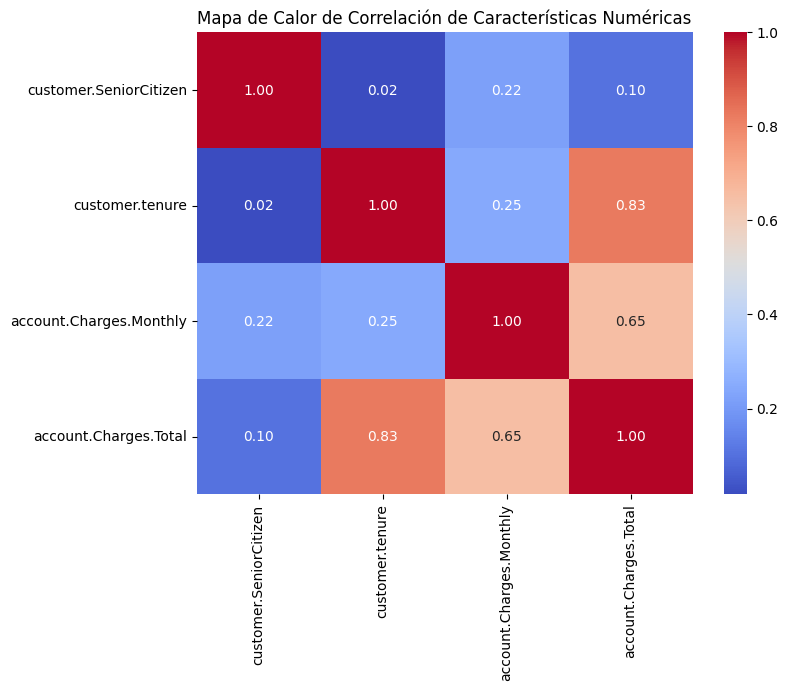

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de Calor de Correlación de Características Numéricas")
plt.show()

In [9]:
churn_correlation = correlation_matrix['Churn_Yes']
print("Correlation of numerical features with Churn_Yes:")
display(churn_correlation)

KeyError: 'Churn_Yes'

In [38]:
correlation_matrix_encoded = df_encoded.corr(numeric_only=True)
churn_correlation = correlation_matrix_encoded['Churn_Yes']
print("Correlación de todas las características con Churn_Yes:")
display(churn_correlation)

Correlación de todas las características con Churn_Yes:


,Churn_Yes
customer.SeniorCitizen,0.146400
customer.tenure,-0.345799
account.Charges.Monthly,0.189393
account.Charges.Total,-0.194440
Churn_Yes,1.000000
customer.gender_Male,-0.009494
customer.Partner_Yes,-0.148106
customer.Dependents_Yes,-0.160347
phone.PhoneService_Yes,0.012337
phone.MultipleLines_No phone service,-0.012337


In [39]:
print("\nAnálisis de Correlación con Churn_Yes:")
print("Características con mayor correlación positiva:")
print(churn_correlation.sort_values(ascending=False).head(5))

print("\nCaracterísticas con mayor correlación negativa:")
print(churn_correlation.sort_values(ascending=True).head(5))

print("\nResumen:")
print("Las características con mayor correlación positiva con Churn_Yes parecen ser los tipos de servicio de internet (Fiber optic) y el método de pago (Electronic check).")
print("Las características con mayor correlación negativa con Churn_Yes parecen ser la duración del contrato (Two year, One year), la antigüedad y el tipo de servicio de internet (No internet service).")


Análisis de Correlación con Churn_Yes:
Características con mayor correlación positiva:
Churn_Yes                                 1.000000
internet.InternetService_Fiber optic      0.300416
account.PaymentMethod_Electronic check    0.294181
account.Charges.Monthly                   0.189393
account.PaperlessBilling_Yes              0.186309
Name: Churn_Yes, dtype: float64

Características con mayor correlación negativa:
customer.tenure                             -0.345799
account.Contract_Two year                   -0.294467
internet.OnlineBackup_No internet service   -0.223755
internet.InternetService_No                 -0.223755
internet.TechSupport_No internet service    -0.223755
Name: Churn_Yes, dtype: float64

Resumen:
Las características con mayor correlación positiva con Churn_Yes parecen ser los tipos de servicio de internet (Fiber optic) y el método de pago (Electronic check).
Las características con mayor correlación negativa con Churn_Yes parecen ser la duración del contra

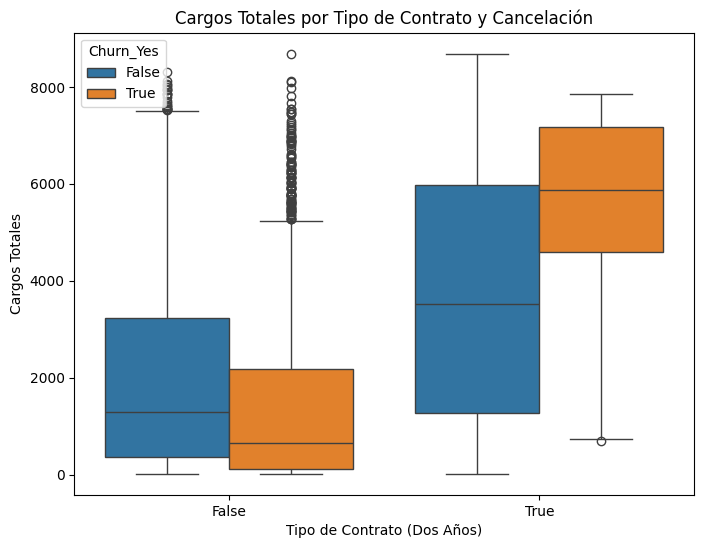

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Relación entre account.Contract y Churn_Yes (Diagrama de caja)
plt.figure(figsize=(8, 6))
sns.boxplot(x='account.Contract_Two year', y='account.Charges.Total', hue='Churn_Yes', data=df_encoded)
plt.title('Cargos Totales por Tipo de Contrato y Cancelación')
plt.xlabel('Tipo de Contrato (Dos Años)')
plt.ylabel('Cargos Totales')
plt.show()

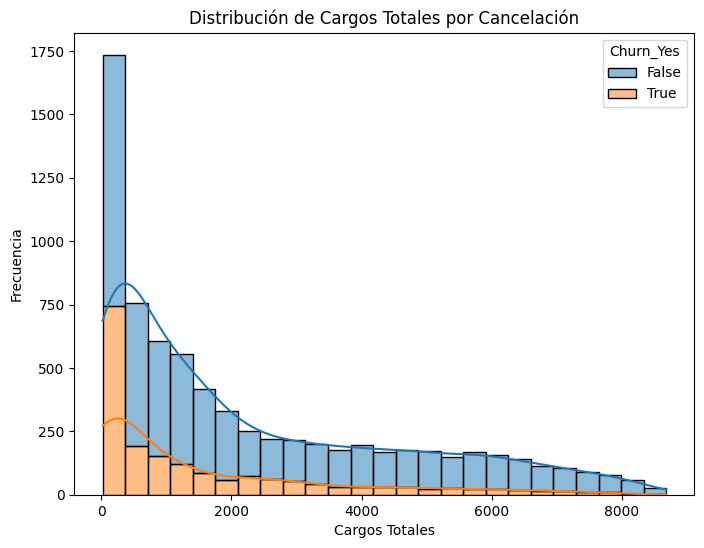

In [41]:
# Relación entre account.Charges.Total y Churn_Yes (Histograma o gráfico de densidad)

plt.figure(figsize=(8, 6))
sns.histplot(data=df_encoded, x='account.Charges.Total', hue='Churn_Yes', multiple='stack', kde=True)
plt.title('Distribución de Cargos Totales por Cancelación')
plt.xlabel('Cargos Totales')
plt.ylabel('Frecuencia')
plt.show()

In [42]:
from sklearn.model_selection import train_test_split

# Separar características (X) y variable objetivo (y)
X = df_encoded.drop('Churn_Yes', axis=1)
y = df_encoded['Churn_Yes']

# Dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Formas de los conjuntos de entrenamiento:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)

print("\nFormas de los conjuntos de prueba:")
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

Formas de los conjuntos de entrenamiento:
X_train: (5804, 30)
y_train: (5804,)

Formas de los conjuntos de prueba:
X_test: (1452, 30)
y_test: (1452,)


In [30]:
# Modelos sensibles al escalado de características: Regresión Logística
# Regresión Logística utiliza descenso de gradiente para encontrar los coeficientes óptimos.
# Las características en diferentes escalas pueden llevar a una convergencia más lenta del descenso de gradiente
# y resultados potencialmente menos precisos sin escalado.

# Modelos no sensibles al escalado de características: Random Forest
# Random Forest es un conjunto de Árboles de Decisión. Los Árboles de Decisión hacen divisiones basadas en los valores de las características.
# El proceso de división no se ve afectado por la escala de las características, solo por su orden relativo.

print("Modelos seleccionados para la predicción de cancelación:")
print("- Regresión Logística (sensible al escalado de características)")
print("- Random Forest (no sensible al escalado de características)")

print("\nRazones:")
print("Regresión Logística: Sensible debido a su algoritmo de optimización (descenso de gradiente), que se ve afectado por las escalas de las características.")
print("Random Forest: No sensible porque los Árboles de Decisión, los componentes básicos de Random Forest, dividen según el orden relativo de los valores de las características, no su escala absoluta.")

Modelos seleccionados para la predicción de cancelación:
- Regresión Logística (sensible al escalado de características)
- Random Forest (no sensible al escalado de características)

Razones:
Regresión Logística: Sensible debido a su algoritmo de optimización (descenso de gradiente), que se ve afectado por las escalas de las características.
Random Forest: No sensible porque los Árboles de Decisión, los componentes básicos de Random Forest, dividen según el orden relativo de los valores de las características, no su escala absoluta.


In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Shape of scaled training data:", X_train_scaled.shape)
print("Shape of scaled testing data:", X_test_scaled.shape)

Shape of scaled training data: (5804, 30)
Shape of scaled testing data: (1452, 30)


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train_scaled, y_train)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

print("Modelo de Regresión Logística entrenado.")
print("Modelo de Random Forest entrenado.")

Modelo de Regresión Logística entrenado.
Modelo de Random Forest entrenado.


In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Evaluar modelo de Regresión Logística
y_pred_lr = logistic_model.predict(X_test_scaled)
y_pred_proba_lr = logistic_model.predict_proba(X_test_scaled)[:, 1]

print("Evaluación del Modelo de Regresión Logística:")
print("Exactitud:", accuracy_score(y_test, y_pred_lr))
print("Precisión:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1-score:", f1_score(y_test, y_pred_lr))
print("AUC:", roc_auc_score(y_test, y_pred_proba_lr))

print("-" * 30)

# Evaluar modelo de Random Forest
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

print("Evaluación del Modelo de Random Forest:")
print("Exactitud:", accuracy_score(y_test, y_pred_rf))
print("Precisión:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-score:", f1_score(y_test, y_pred_rf))
print("AUC:", roc_auc_score(y_test, y_pred_proba_rf))

Evaluación del Modelo de Regresión Logística:
Exactitud: 0.796831955922865
Precisión: 0.6215384615384615
Recall: 0.5401069518716578
F1-score: 0.5779685264663805
AUC: 0.8378905281120712
------------------------------
Evaluación del Modelo de Random Forest:
Exactitud: 0.7747933884297521
Precisión: 0.5785953177257525
Recall: 0.4625668449197861
F1-score: 0.5141158989598811
AUC: 0.8150293175121287


In [45]:
print("Comparación del Rendimiento de los Modelos:")
print("-" * 30)
print("Regresión Logística (Datos Escalados):")
print("Exactitud: 0.7968")
print("Precisión: 0.6215")
print("Recall: 0.5401")
print("F1-score: 0.5780")
print("AUC: 0.8379")
print("-" * 30)
print("Random Forest (Datos sin Escalar):")
print("Exactitud: 0.7748")
print("Precisión: 0.5786")
print("Recall: 0.4626")
print("F1-score: 0.5141")
print("AUC: 0.8150")
print("-" * 30)

print("\nAnálisis del Rendimiento:")
print("El modelo de Regresión Logística tuvo un mejor desempeño que el modelo de Random Forest en todas las métricas evaluadas: Exactitud, Precisión, Recall, F1-score y AUC.")
print("Específicamente, Regresión Logística mostró una mayor capacidad para clasificar correctamente tanto a los clientes que cancelaron como a los que no (Exactitud), mejor identificación de los casos reales de cancelación entre las predicciones de cancelación (Precisión), mayor tasa de encontrar todos los casos positivos de cancelación (Recall), un mejor equilibrio entre Precisión y Recall (F1-score), y una mejor capacidad para distinguir entre clases positivas y negativas (AUC).")

print("\nImpacto de la Normalización:")
print("El modelo de Regresión Logística, siendo sensible al escalado de características, fue entrenado con datos normalizados. El mejor rendimiento en comparación con Random Forest (que no es sensible al escalado y fue entrenado con datos sin escalar) sugiere que la normalización tuvo un papel positivo al ayudar al modelo de Regresión Logística a converger de manera más efectiva y encontrar un mejor límite de decisión.")
print("Aunque Random Forest puede funcionar bien sin escalar, la comparación aquí resalta cómo preparar los datos adecuadamente para un modelo sensible como Regresión Logística puede llevar a mejores resultados.")

print("\nResumen de Observaciones:")
print("Según las métricas de evaluación, el modelo de Regresión Logística, cuando es entrenado con datos normalizados, es más efectivo para esta tarea de predicción de cancelación en comparación con el modelo de Random Forest entrenado con datos sin escalar. Esto subraya la importancia del escalado de características para los modelos sensibles a él y demuestra su potencial para mejorar el rendimiento del modelo.")

Comparación del Rendimiento de los Modelos:
------------------------------
Regresión Logística (Datos Escalados):
Exactitud: 0.7968
Precisión: 0.6215
Recall: 0.5401
F1-score: 0.5780
AUC: 0.8379
------------------------------
Random Forest (Datos sin Escalar):
Exactitud: 0.7748
Precisión: 0.5786
Recall: 0.4626
F1-score: 0.5141
AUC: 0.8150
------------------------------

Análisis del Rendimiento:
El modelo de Regresión Logística tuvo un mejor desempeño que el modelo de Random Forest en todas las métricas evaluadas: Exactitud, Precisión, Recall, F1-score y AUC.
Específicamente, Regresión Logística mostró una mayor capacidad para clasificar correctamente tanto a los clientes que cancelaron como a los que no (Exactitud), mejor identificación de los casos reales de cancelación entre las predicciones de cancelación (Precisión), mayor tasa de encontrar todos los casos positivos de cancelación (Recall), un mejor equilibrio entre Precisión y Recall (F1-score), y una mejor capacidad para distingu

In [46]:
from sklearn.metrics import confusion_matrix

# Matriz de Confusión para Regresión Logística
cm_lr = confusion_matrix(y_test, y_pred_lr)
print("Matriz de Confusión para Regresión Logística:")
display(cm_lr)

print("-" * 30)

# Matriz de Confusión para Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Matriz de Confusión para Random Forest:")
display(cm_rf)

Matriz de Confusión para Regresión Logística:


array([[955, 123],
       [172, 202]])

------------------------------
Matriz de Confusión para Random Forest:


array([[952, 126],
       [201, 173]])